# Import Library

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

In [33]:
path_dir = './output'
train = './output/train'
test = './output/test'
val = './output/validation'

## Preprocessing

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [25]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 300),
    batch_size=4,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val,
    target_size=(150, 300),
    batch_size=2,
    shuffle=True,
    class_mode='categorical'
)

Found 12431 images belonging to 2 classes.
Found 3729 images belonging to 2 classes.


## Visualization


In [34]:
train_generator.class_indices

{'non-vehicles': 0, 'vehicles': 1}

In [35]:
x_train,y_train = train_generator.next()
print(x_train.shape,y_train.shape)

(4, 150, 300, 3) (4, 2)


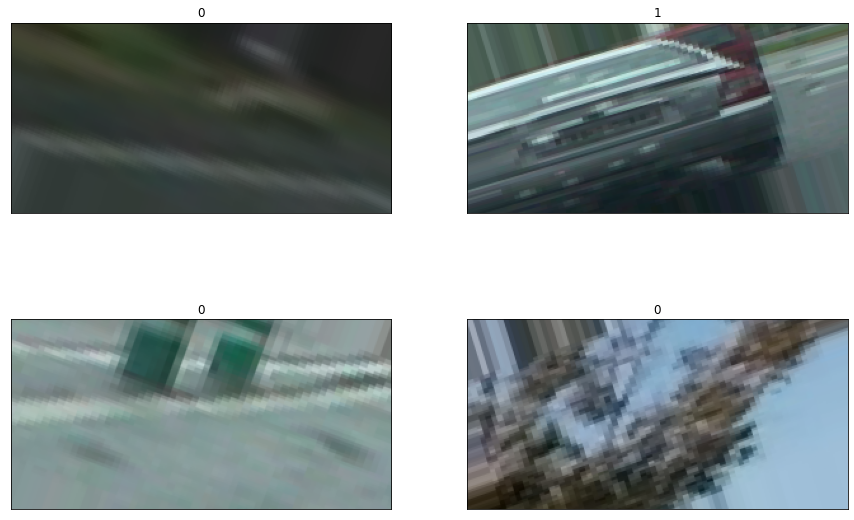

In [36]:
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(np.argmax(y_train[i]))

## Modelling

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=[150, 300, 3]),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 298, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 99, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 77616)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                2483744   
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,484,258
Trainable params: 2,484,258
Non-trainable params: 0
____________________________________________

In [30]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Evaluasi

In [31]:
hasil = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
3108/3108 [==============================] - 271s 87ms/step - loss: 0.2726 - accuracy: 0.8964 - val_loss: 0.1502 - val_accuracy: 0.9528
Epoch 2/10
3108/3108 [==============================] - 274s 88ms/step - loss: 0.1648 - accuracy: 0.9414 - val_loss: 0.1274 - val_accuracy: 0.9499
Epoch 3/10
3108/3108 [==============================] - 259s 83ms/step - loss: 0.1434 - accuracy: 0.9505 - val_loss: 0.0832 - val_accuracy: 0.9716
Epoch 4/10
3108/3108 [==============================] - 265s 85ms/step - loss: 0.1205 - accuracy: 0.9570 - val_loss: 0.0982 - val_accuracy: 0.9667
Epoch 5/10
3108/3108 [==============================] - 274s 88ms/step - loss: 0.1068 - accuracy: 0.9653 - val_loss: 0.0535 - val_accuracy: 0.9820
Epoch 6/10
3108/3108 [==============================] - 259s 83ms/step - loss: 0.1001 - accuracy: 0.9665 - val_loss: 0.0908 - val_accuracy: 0.9686
Epoch 7/10
3108/3108 [==============================] - 262s 84ms/step - loss: 0.0826 - accuracy: 0.9733 - val_loss: 0

Text(0.5, 1.0, 'loss')

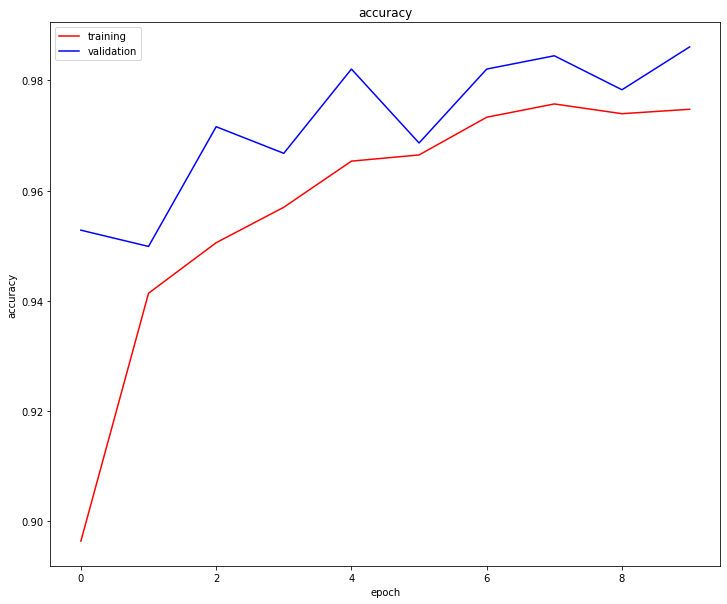

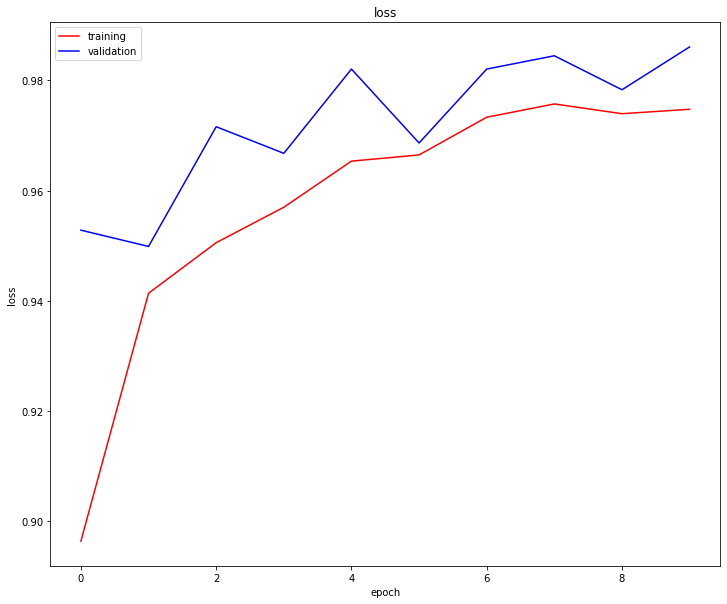

In [37]:
accuracy_train = hasil.history['accuracy']
val_accuracy_train = hasil.history['val_accuracy']
loss_train =  hasil.history['loss']
val_loss = hasil.history['val_loss']
x = range(len(accuracy_train))

plt.figure(1, figsize=(12,10))
plt.plot(x, accuracy_train, c='r', label='training')
plt.plot(x, val_accuracy_train, c='b', label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')
         
plt.figure(2, figsize=(12,10))
plt.plot(x, accuracy_train, c='r', label='training')
plt.plot(x, val_accuracy_train, c='b', label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss')